In [56]:
'''
LOGISTIC REGRESSION
Adapted From example given in Chapter 4 of 
Introduction to Statistical Learning
Data: Default Data Set
'''

import pandas as pd
import numpy as np

# We're using a new module from sklearn.linear_model called LogisticRegression
#  
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

%matplotlib inline

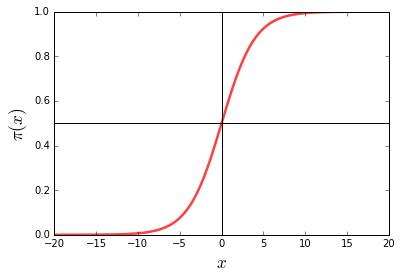

In [57]:
# Step 1: Acquire and clean data

'''
QUIZ: UNDERSTANDING THE BASIC SHAPE
http://matplotlib.org/users/mathtext.html
'''
x = np.linspace(-20, 20, 1000)
beta = [0, 0.5]
y = np.exp(beta[0] + beta[1]*x) / (1 + np.exp(beta[0] + beta[1]*x))

# Plotting
plt.plot(x, y, 'r', alpha=0.75, linewidth=2.5)
plt.plot([0,0], [0, 1], 'k')
plt.plot([-20,20], [0.5, 0.5], 'k')
plt.xlabel(r'$x$', fontsize='xx-large')
plt.ylabel(r'$\pi(x)$', fontsize='xx-large');

# Step 1: Acquire and clean data

In [58]:
'''
PART I - Exploration
'''

# 1 - Read in Default.csv and convert all data to numeric
d = pd.read_csv('https://github.com/ga-students/DAT-NYC-37/raw/master/lessons/lesson-11/datasets/Default.csv')

# Whether a person defaulted on a loan depending on whether person was 
# student, balance, and annual income
d.head()

,default,student,balance,income
0,0,No,729.526495,44361.62507
1,0,Yes,817.180407,12106.13470
2,0,No,1073.549164,31767.13895
3,0,No,529.250605,35704.49394
4,0,No,785.655883,38463.49588


In [59]:
# d.describe()

In [60]:
# Convert everything to numeric before splitting (np.wher )
if (d.dtypes['student'] != np.int):
    d.student = np.where(d.student == 'Yes', 1, 0)
    
# Can also use `df.replace`

# Step 2: Define train/test split

In [61]:
X = d[['balance','student','income']]
y = d.default

# random_state is just a seed value for the initial state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Hold out 3000 examples for testing (in both X and y)
# Keep (7000 or 70% for training)

In [62]:
# Optional: Convert them back into dataframes, for convenience
train = pd.DataFrame(data=X_train, columns=['balance','student','income'])
train['default'] = y_train

test = pd.DataFrame(data=X_test, columns=['balance','student','income'])
test['default'] = y_test

# How many cols/rows does train have? test have?

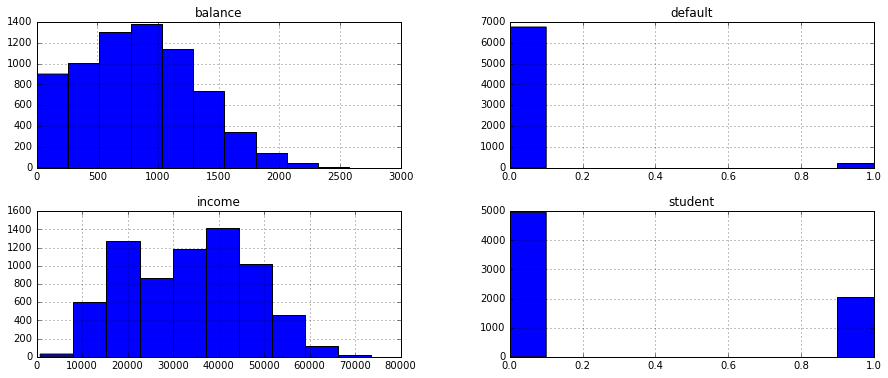

In [63]:
# pd.scatter_matrix(train, figsize=(20, 20))
# 
# 3 - Create a histogram of all variables
train.hist(figsize=(15, 6));

(0, 2800)

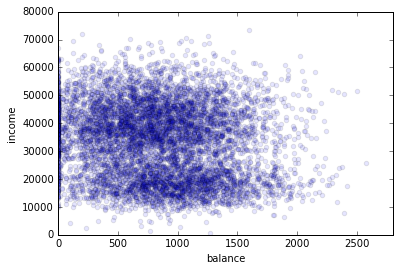

In [64]:
# 4 - Create a scatter plot of the income vs. balance
train.plot(x='balance', y='income', kind='scatter', alpha=0.1)
plt.ylim([0,80000]); plt.xlim([0, 2800])

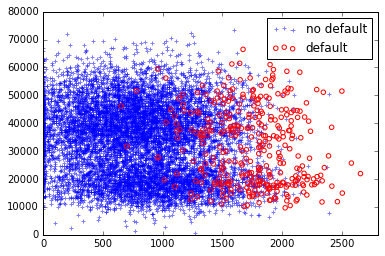

In [67]:
# 5 - Mark defaults with a different color and symbol
train_nd = d[d.default == 0]
train_d = d[d.default == 1]

plt.figure()

from sklearn import feature_selection

##
# f_regression: Select features based on relevance to fit
#  Input: 
#     - Input Matrix X
#     - Target variable y
#  Output:
#     - A list of f-values and their respective p-scores
#        (Larger f-value means greater significant lower p-score)
# feature.f_regression(X, y)  -> gives a list of rankings of feature relevance

##
# f_classif: Select features based on relevance to classification
#  Input: 
#     - Input Matrix X
#     - Target variable y
#  Output:
#     - A list of f-values and their respective p-scores
#        (Larger f-value means greater significant lower p-score)
# feature.f_classif(X, y)

plt.scatter(train_nd.balance, train_nd.income, alpha = .5, marker='+', c= 'b')
plt.scatter(train_d.balance, train_d.income, marker='o', edgecolors = 'r', facecolors = 'none')
plt.ylim([0,80000]); plt.xlim([0, 2800])
plt.legend( ('no default', 'default'), loc='upper right');

#### What can you infer from this plot?
*It appears that the balance is more correlated with default than income*

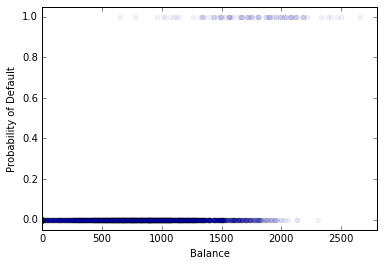

In [68]:
plt.figure()
plt.scatter(test.balance, test.default, alpha=0.05)
plt.xlabel("Balance")
plt.ylabel("Probability of Default")
plt.ylim([-0.05,1.05]); plt.xlim([0, 2800]);

In [69]:
# Step 3: Select & Fit the model (note the similarity to LinearRegression)

# 1 - Run a *logistic regression* (no regularization) on the balance variable
# 2 - Is the beta  value associated with balance significant?

# The model we're using for classification
balance = LogisticRegression()   # We used LinearRegression() before!

# TODO: Apply the fit to determine coefficients of our sigmoid function
balance.fit(train[['balance']], y_train)

B1 = balance.coef_[0][0]
B0 = balance.intercept_[0]
np.exp(B1)

print "Beta1", B1
print "Beta0", B0

Beta1 0.0042979750671
Beta0 -8.60113298968


In [70]:
# TODO: 

# What is the probability of default for a balance of 1000, 2200 dollars?
#  (No sklearn)

##
# Sigmoid function:
# p = 1 / (1 + e^-x)
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

p_1000 = sigmoid(B0 + B1 * 1000)
p_2200 = sigmoid(B0 + B1 * 2200)

print "Probability of default for balance=%s: %s" % (1000, p_1000)
print "Probability of default for balance=%s: %s" % (2200, p_2200)

Probability of default for balance=1000: 0.0133452729374
Probability of default for balance=2200: 0.70149187347


In [71]:
is_likely_to_default = balance.predict(pd.DataFrame({'balance': [1000.0, 2200.0]}))

probabilities = balance.predict_proba(pd.DataFrame({'balance': [1000.0, 2200.0]}))

print is_likely_to_default
probabilities

[0 1]


array([[ 0.98665473,  0.01334527],
       [ 0.29850813,  0.70149187]])

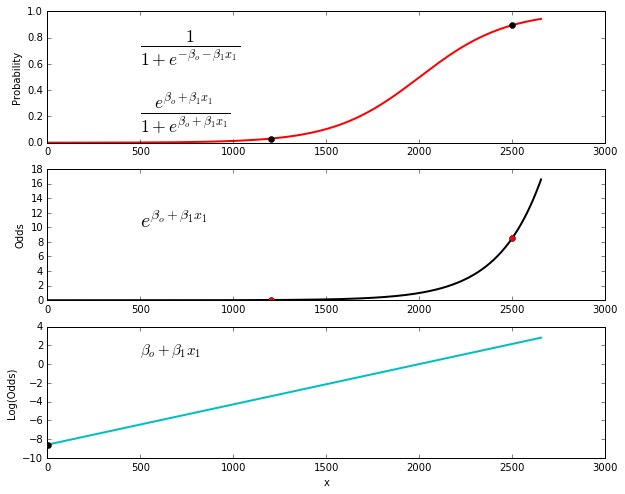

In [72]:
# Beta is significant!

# 2 - Predict the probability of default for someone with a balance of $1.2k and $2.5k
prob = balance.predict(pd.DataFrame({'balance': [1000, 2200]}))

# What does beta mean? Let's create some plots to find out!
x = np.linspace(test.balance.min(), test.balance.max(), 500)
beta = [B0,B1]

y = np.exp(beta[0] + beta[1]*x) / (1 + np.exp(beta[0] + beta[1]*x))
odds = np.exp(beta[0] + beta[1]*x)
log_odds = beta[0] + beta[1]*x

# Plot the probability
plt.figure(figsize=(10, 8))
plt.subplot(311)
plt.plot(x, y, 'r', linewidth=2)
plt.ylabel('Probability')
plt.text(500, 0.7, r'$\frac{1}{1+e^{-\beta_o - \beta_1x_1}}$', fontsize=25)
plt.text(500, 0.2, r'$\frac{e^{\beta_o + \beta_1x_1}}{1+e^{\beta_o + \beta_1x_1}}$', fontsize=25)

# plot the odds
plt.subplot(312)
plt.plot(x, odds, 'k', linewidth=2)
plt.ylabel('Odds')
plt.text(500, 10, r'$e^{\beta_o + \beta_1x_1}$', fontsize=20)

# Plot the log odds
plt.subplot(313)
plt.plot(x, log_odds, 'c', linewidth=2)
plt.ylabel('Log(Odds)')
plt.xlabel('x')
plt.text(500, 1, r'$\beta_o + \beta_1x_1$', fontsize=15)

'''
From Page 133 in "Introduction to Statistical Learning"
increasing X by one unit changes the log odds by Beta1, or equivalently
it multiplies the odds by e^Beta1 . However,because the relationship between
p(X) and X in is not a straight line, Beta1 does not correspond to the change
in p(X) associated with a one-unit increase in X. The amount that 
p(X) changes due to a one-unit change in X will depend on the current 
value of X.

Example: In our example, Beta1 = 0.0042979750671040349 ~= 0.0043

Log-odds: 
If you increase x by 1, you increase the log-odds by 0.0043. 
If you increase x by 800, you increase the log-odds by 0.0043*800 = 3.44

If you increase x by 1, you multiply the odds by e^0.0043. 
If you increase x by 800, you mutliply the odds by e^(0.0043*800) = 31.187, not 800 * e^(0.0043)
'''

pts = 1
# Now let's try plotting some points
plt.subplot(313)
log_odds_pts = beta[0] + beta[1]*pts
plt.plot(pts, log_odds_pts , 'ko');

plt.subplot(311)
pts = np.array([1200, 2500])
ypts = np.exp(beta[0] + beta[1]*pts) / (1 + np.exp(beta[0] + beta[1]*pts))
plt.plot(pts, ypts, 'ko')

plt.subplot(312)
odds_pts = np.exp(beta[0] + beta[1]*pts)
plt.plot(pts, odds_pts, 'ro');

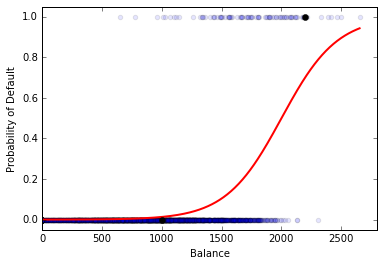

In [73]:
# 3 - Plot the fitted logistic function overtop of the data points
plt.figure()
plt.scatter(test.balance, test.default, alpha=0.1)
plt.plot(x, y, 'r', linewidth=2)
plt.xlabel("Balance")
plt.ylabel("Probability of Default")
plt.ylim([-0.05,1.05]); plt.xlim([0, 2800])
plt.plot([1000, 2200], prob, 'ko');

In [74]:
# 4 - Create predictions using the balance model on the test set
test['pred_default'] = balance.predict(test[['balance']])

In [96]:
# Ground truth: `actual_default`

# Loan did default and both prediction and actual were correct
true_positives = (test['default'] == test['pred_default']) & \
    (test['pred_default'] == 1)

# Loan did not default and both prediction and actual were correct
true_negatives = (test['default'] == test['pred_default']) & \
    (test['pred_default'] == 0)

# Loan did not default, but was predicted to default
false_positives = (test['default'] != test['pred_default']) & \
    (test['pred_default'] == 1)

# Loan did default, but was predicted to not default
false_negatives = (test['default'] != test['pred_default']) & \
    (test['pred_default'] == 0)

n = len(test)
tp = sum(true_positives)  # 25
tn = sum(true_negatives)  # 2903
fp = sum(false_positives) # 6
fn = sum(false_negatives) # 66

print "N: ", len(test)
print

from sklearn import metrics

recall = float(tp) / (tp + fn)
print "Recall by hand: ", recall
# print "Sklearn: ", metrics.recall_score(test['default'], test['pred_default']), "\n"

precision = float(tp) / (tp + fp)
print "Precision By hand: ", precision

# We want high recall and precision!
# recall bounded [0, 1]
# precision bounded by [0, 1]

# The product of recall and precision will be less than either
# (2 * recall * precision) <= (recall + precision)   # Triangle inequality

(2 * recall * precision) / (recall + precision) <= 1

## A more robust way of evaluating our classifier:
# F1-Score: (2 * recall * precision) / (recall + precision)
# 

f1_score = (2 * recall * precision) / (recall + precision)
print "Derived F1 Score: ", f1_score
print "F1 Score (sklearn): ", metrics.f1_score(test['default'], test['pred_default'])

N:  3000

Recall by hand:  0.274725274725
Precision By hand:  0.806451612903
Derived F1 Score:  0.409836065574
F1 Score (sklearn):  0.409836065574


In [ ]:
## y

# 5 - Compute the overall accuracy, the sensitivity and specificity
# Accuracy
accuracy = sum(test.pred_class == test.default) / float(len(test.default))

# Specificity
# For those who didn't default, how many did it predict correctly?
test_nd = test[test.default == 0]
specificity = sum(test_nd.pred_class == test_nd.default) / float(len(test_nd.default))

# Sensitivity
# For those who did default, how many did it predict correctly? 
test_d = test[test.default == 1]
sensitivity = sum(test_d.pred_class == test_d.default) / float(len(test_d.default))

# This raises the question, how does our overall 
# classification accuracy compare to the not-default rate?
null = 1 - sum(d.default) / float(len(d.default))

# This illustrates an important point, class imbalance can result in accuracy
# measures that are misleading. After all, if you would have just guessed not
# going to default, you would be correct 96.67 % of the time.

f1_score = 2 * (sensitivity * specificity) / (sensitivity + specificity)

print accuracy
print "Sensitivity (Aka Recall proportion of actual positives which are correctly - identified): ", sensitivity
print "Specificity (proportion of negatives which are correctly identified): ", specificity

print "F1 Score: ", f1_score

In [ ]:
from sklearn import metrics

